Gabriela Pacek

Analyzed enzymes: BSS (benzyl succinate synthase) isoforms, isolated from various bacteria. 

Data source: brenda-enzymes

Analyzed parameters: molecular weight, number of amino acids, microorganism.

Method: clustering

Code was written with a lot of help from the following sites:
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Plotting-a-Dendrogram
https://github.com/marcinwolter/MachineLearning2020/blob/main/plot_linkage_comparison.ipynb
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
Stack overflow


In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import scipy
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage as lk
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [293]:
enz1=np.array([['ENTRY NAME','ORGANISM','NO. OF AA','MOLECULAR WEIGHT[Da]'],
['BSSA_THAAR','Thauera aromatica',861,97736],
['BSSB_THAAR','Thauera aromatica',74,8752],
['BSSC_THAAR','Thauera aromatica',57,6619],
['W8SQ38_ECOLX','Escherichia coli',810,90124],
['A0A1C9UK74_9PROT','Magnetospirillum sp',620,69357],
['A0A1A6B2M9_9CLOT','Clostridium ragsdalei P11',784,88981],
['A0A445MV39_9DELT','uncultured Desulfobacterium sp',808,92187],
['A0A1V4IIE1_9CLOT','Clostridium chromiireducens',827,94252],
['A0A1V5S3F2_9FIRM','Firmicutes bacterium ADurb.Bin300',788,88320],
['A0A1H5T9P9_9RHOO','Thauera chlorobenzoica',861,97827],
['A0A1V5FTR2_9BACT','candidate division BRC1 bacterium ADurb.BinA364',451,50269],
['A0A1V5PZZ5_9ACTN','Actinobacteria bacterium ADurb.Bin346',520,57520],
['K0ND30_DESTT','Desulfobacula toluolica (strain DSM 7467 / Tol2)',813,91735],
['K0N2E2_DESTT','Desulfobacula toluolica (strain DSM 7467 / Tol2)',73,8523],
['A0A1S8TJ15_9CLOT','Clostridium sp. BL-8',847,93422],
['Q8KUX8_GEOME','Geobacter metallireducens',86,9540],
['A0A3R9HXG8_STRSA','Streptococcus sanguinis',813,91259],
['A0A3R9I9B6_STRSA','Streptococcus sanguinis',813,91278],
['A0A136WD40_9FIRM','Anaerotignum neopropionicum',790,88472],
['A0A1U7MEY5_9FIRM','Sporomusa sphaeroides DSM 2875',792,89214],
['A0A4Y7R9G3_9FIRM','Pelotomaculum schinkii',877,97597],
['A0A2B7MNT5_9ESCH','Escherichia marmotae',810,90174],
['A0A1V6HI55_9BACT','Bacteroidetes bacterium ADurb.Bin041',788,88611],
['A0A1V5VES8_9BACT','bacterium ADurb.Bin236',858,94298],
['A0A1V5VEW7_9BACT','bacterium ADurb.Bin236',989,110508],
['A0A1E3AVS7_9FIRM','Eisenbergiella tayi',779,87843],
['A0A1V5JUM0_9BACT','Synergistetes bacterium ADurb.Bin520',372,40978],
['A0A1V5XI09_9DELT','Deltaproteobacteria bacterium ADurb.Bin207',1035,116026],
['A0A485LXE3_9ZZZZ','anaerobic digester metagenome',839,94984],
['A0A508UFM3_9GAMM','Phytobacter ursingii',229,26004],
['A0A259U5C6_9FIRM','Sporomusa acidovorans DSM 3132',791,88728],
['A0A3R9GPK9_STRSA','Streptococcus sanguinis',813,91289],
['A0A1V6BU87_9BACT','Bacteroidetes bacterium ADurb.Bin139',811,90670],
['A0A1C9U7I7_9BACT','uncultured bacterium',116,13192],
['A0A1C9U7I4_9BACT','uncultured bacterium',155,17975],
['A0A125RFU3_9BACT','uncultured bacterium',219,25033],
['A0A2T0BKU4_9CLOT','Clostridium luticellarii',801,90849],
['A0A564TJW1_STRGN','Streptococcus gordonii',813,91465],
['A0A1V6JFP9_9BACT','Bacteroidetes bacterium ADurb.Bin012',791,90085],
['A0A1V5UJJ7_9BACT','Tenericutes bacterium ADurb.Bin239',682,78187],
['A0A564SVQ0_STRCV','Streptococcus constellatus',813,91465],
['A0A508UC23_9GAMM','Phytobacter ursingii',810,90356],
['A0A1V5UNK1_9BACT','Lentisphaerae bacterium ADurb.Bin242',429,48719],
['A0A1S8TPN6_9CLOT','Clostridium sp. BL-8',784,88612],
['A0A1V5PAP1_9FIRM','Firmicutes bacterium ADurb.Bin356',792,87816],
['A0A1V5IWJ4_9FIRM','Firmicutes bacterium ADurb.BinA052',621,69356],
['A0A3R9HNY0_STRSA','Streptococcus sanguinis',813,91344],
['A0A1V5GWG8_9DELT','Deltaproteobacteria bacterium ADurb.BinA179',595,66672],
['A0A1V6ISR8_9DELT','Deltaproteobacteria bacterium ADurb.Bin022',436,48480],
['A0A2I8B5Y4_9BACT','uncultured bacterium',252,28886],
['A0A127AXK5_9BACT','uncultured bacterium',237,27180],
['A0A125RFV1_9BACT','uncultured bacterium',234,26748],
['E2QII9_ECOLX','Escherichia coli',810,90169],
['S0FXN7_9DELT','Desulfotignum phosphitoxidans DSM 13687',58,6833],
['A0A140LAC5_9THEO','Fervidicola ferrireducens',810,92299],
['A0A4Y7RYN6_9FIRM','Pelotomaculum sp. FP',847,93744],
['A0A1V5KMI1_9BACT','Verrucomicrobia bacterium ADurb.Bin474',423,47726],
['A0A1V5KGV6_9FIRM','Firmicutes bacterium ADurb.Bin467',785,87412],
['A0A1E3AST1_9FIRM','Eisenbergiella tayi',681,77678],
['A0A1V5I7J1_9BACT','Synergistetes bacterium ADurb.BinA166',786,88249],
['A0A5C6D4G5_9BACT','Planctomycetes bacterium Poly41',808,90639],
['A0A0F0CL90_9CLOT','Clostridium sp. FS41',793,89079],
['A0A1V5ULT3_9BACT','Lentisphaerae bacterium ADurb.Bin242',735,83361],
['A0A1V5J3X7_9FIRM','Firmicutes bacterium ADurb.BinA052',788,87944],
['A0A259UB11_9FIRM','Sporomusa silvacetica DSM 10669',825,93889],
['A0A2S9XTD4_9DELT','Enhygromyxa salina',847,92965],
['A0A125RFU2_9BACT','uncultured bacterium',234,26676],
['A0A1C9U7J5_9BACT','uncultured bacterium',264,30109],
['A0A127AXL3_9BACT','uncultured bacterium',231,26221],
['A0A564UEB7_9FIRM','Dorea formicigenerans',803,90360],
['A0A1X7ASW0_9GAMM','Parendozoicomonas haliclonae',799,89036],
['A0A1V5YF74_9CHLR','Chloroflexi bacterium ADurb.Bin180',801,88898],
['A0A564VDS2_9FIRM','Blautia luti ',841,94104],
['A0A428D376_STRMT','Streptococcus mitis ',812,91327],
['A0A1V5PAQ2_9FIRM','Firmicutes bacterium ADurb.Bin356 ',762,86946],
['A0A161WR93_9CLOT','Clostridium magnum DSM 2767 ',757,85174],
['A0A1V6JWA7_9BACT','Verrucomicrobia bacterium ADurb.Bin006 ',799,89313],
['A0A1Q9PBI2_9ARCH','Candidatus Thorarchaeota archaeon AB_25 ',770,86504],
['A0A125RFU5_9BACT','uncultured bacterium ',234,26365],
['A0A125RFU4_9BACT','uncultured bacterium ',234,26715],
['A0A2I8B5Z8_9BACT','uncultured bacterium ',254,29070],
['A0A0X8I8A5_9BACT','uncultured bacterium ',234,26765],
['A0A1V6GJX1_9DELT','Deltaproteobacteria bacterium ADurb.Bin072 ',838,94519],
['A0A445MYT8_9DELT','uncultured Desulfobacterium sp ',808,92191],
['Q8KUX9_GEOME','Geobacter metallireducens ',411,45956],
['A0A5C5YMX8_9BACT','Planctomycetes bacterium CA13 ',786,88537],
['A0A1V6G628_9BACT','Planctomycetes bacterium ADurb.Bin069 ',788,87714],
['A0A127AXK7_9BACT','uncultured bacterium ',239,27308],
['A0A2I8B5X0_9BACT','uncultured bacterium ',254,29137],
['A0A2I8B602_9BACT','uncultured bacterium ',251,28773],
['A0A125RFU1_9BACT','uncultured bacterium ',234,26614],
['A0A127AYY9_9BACT','uncultured bacterium ',245,28129],
['A0A1V5R5G9_9BACT','Acidobacteria bacterium ADurb.Bin340 ',710,78785],
['A0A445N118_9DELT','uncultured Desulfobacterium sp ',839,94889],
['A0A1V4IVS6_9CLOT','Clostridium chromiireducens ',784,88550],
['A0A1C3HEA7_SERMA','Serratia marcescens ',810,90333],
['A0A514EU92_9ENTR','Raoultella electrica ',810,90092],
['A0A1V6HR02_9DELT','Deltaproteobacteria bacterium ADurb.Bin058 ',1032,115109],
['A0A1V6A1L3_9BACT','Synergistetes bacterium ADurb.Bin155 ',813,90495],
['A0A1V5ZTA5_9BACT','Candidatus Latescibacteria bacterium ADurb.Bin168 ',788,89298],
['A0A1V5ZSN0_9BACT','Candidatus Latescibacteria bacterium ADurb.Bin168 ',727,81937],
['A0A427ZZM2_STRSA','Streptococcus sanguinis ',790,88600],
['A0A564TDL8_9FIRM','Blautia obeum ',839,93710],
['A0A1V6IUI4_9DELT','Deltaproteobacteria bacterium ADurb.Bin022 ',1024,114968],
['A0A1V6ELA1_9BACT','Bacteroidetes bacterium ADurb.Bin090 ',788,88983],
['A0A1C9U7I8_9BACT','uncultured bacterium ',276,30754],
['A0A0B5QSQ0_CLOBE','Clostridium beijerinckii ',844,93593],
['A0A564UZJ1_ENTAV','Enterococcus avium ',622,71530],
['A0A4Y7RZD3_9FIRM','Pelotomaculum sp. FP ',843,93624],
['A0A3R9RN61_STRIT','Streptococcus intermedius ',814,91432],
['A0A0U5PAB4_9CLOT','Clostridium sp. C105KSO14 ',803,91154],
['A0A1N6M724_9VIBR','Vibrio spartinae ',810,90193],
['A0A1V5VV34_9CHLR','Chloroflexi bacterium ADurb.Bin222 ',699,77007],
['A0A518AJ00_9BACT','Planctomycetes bacterium Pan181 ',786,87894],
['K0NCD2_DESTT','Desulfobacula toluolica (strain DSM 7467 / Tol2) ',862,97776],
['A0A348AJ87_9FIRM ','Methylomusa anaerophila ',825,92195],
['A0A348ALX8_9FIRM ','Methylomusa anaerophila ',790,88869],
['A0A348AJ86_9FIRM ','Methylomusa anaerophila ',827,92882],
['A0A1J5P279_MOOTH','Moorella thermoacetica ',775,87284],
['A0A1S8Q137_CLOBE','Clostridium beijerinckii ',844,93512],
['A0A259UT46_9FIRM','Sporomusa acidovorans DSM 3132 ',756,83854],
['A0A259UW16_9FIRM','Sporomusa acidovorans DSM 3132 ',792,89121],
['A0A125RFU6_9BACT','uncultured bacterium ',234,26749],
['A0A127AXN1_9BACT','uncultured bacterium ',231,26285],
['A0A127AXK9_9BACT','uncultured bacterium ',241,27485],
['A0A1C9U7J1_9BACT','uncultured bacterium ',227,26055],
['A0A2I8B5X5_9BACT','uncultured bacterium ',248,28557],
['A0A2T0BCD5_9CLOT','Clostridium vincentii ',759,86697],
['A0A1V6DFM0_9CHLR','Chloroflexi bacterium ADurb.Bin120 ',839,94876],
['A0A1M7YZF0_9VIBR','Vibrio quintilis ',1003,112427],
['A0A1V5HZJ5_9SPIR','Spirochaetes bacterium ADurb.BinA120 ',793,88363],
['A0A1V6FJ14_9BACT','Lentisphaerae bacterium ADurb.Bin082 ',758,85259],
['A0A1S8PV43_CLOBE','Clostridium beijerinckii ',784,88570],
['A0A1V5GYU2_9BACT','Lentisphaerae bacterium ADurb.BinA184 ',678,73130],
['A0A1V5HCF3_9BACT','Lentisphaerae bacterium ADurb.BinA184 ',732,80494],
['A0A1V6D5E2_9BACT','Planctomycetes bacterium ADurb.Bin126 ',790,88165],
['A0A259UCJ5_9FIRM','Sporomusa acidovorans DSM 3132 ',787,87410],
['A0A1V5ZSA9_9BACT','Candidatus Latescibacteria bacterium ADurb.Bin168 ',407,44181],
['A0A564URE5_9FIRM','Blautia obeum ',739,84993],
['A0A4Y7RAK7_9FIRM','Pelotomaculum schinkii ',843,93717],
['A0A240EQ99_9VIBR','Vibrio thalassae ',763,84982],
['A0A125RFU7_9BACT','uncultured bacterium ',218,24958],
['A0A2I8B600_9BACT','uncultured bacterium ',252,29009],
['A0A2I8B5X9_9BACT','uncultured bacterium ',252,28936],
['A0A127AXQ3_9BACT','uncultured bacterium ',247,28290],
['A0A127AYY3_9BACT','uncultured bacterium ',243,27744],
['A0A125RFU8_9BACT','uncultured bacterium ',234,26565],
['I6LHT8_9RHOO','Azoarcus sp. CIB ',864,97489],
['A0A3R9JMJ5_STRIT','Streptococcus intermedius ',814,91425],
['A0A1U9NQS9_9BACT','Phycisphaerae bacterium ST-NAGAB-D1 ',787,87948],
['A0A1R7T5X5_9BACT','Phycisphaerae bacterium SM-Chi-D1 ',818,93770],
['A0A1E3ASZ6_9FIRM','Eisenbergiella tayi ',770,87417],
['A0A143ZQQ3_9FIRM','Eubacteriaceae bacterium CHKCI005 ',783,88205],
['A0A3R9L7T7_STRGN','Streptococcus gordonii ',813,91334],
['A0A1V6AYK3_9BACT','Candidatus Aminicenantes bacterium ADurb.Bin147 ',787,87944],
['A0A1V6FEW8_9FIRM','Firmicutes bacterium ADurb.Bin080 ',829,93753],
['A0A1V6AT19_9DELT','Deltaproteobacteria bacterium ADurb.Bin151 ',991,111805],
['A0A1V5PFW8_9CHLR','Chloroflexi bacterium ADurb.Bin360 ',480,52953],
['A0A1S8S8Q0_CLOBE','Clostridium beijerinckii ',784,88622],
['A0A161W1J5_9CLOT','Clostridium magnum DSM 2767 ',789,88611],
['A0A427ZMG7_STRSA','Streptococcus sanguinis ',813,91333],
['A0A428AX48_STRSA','Streptococcus sanguinis ',813,91315],
['A0A259UB59_9FIRM','Sporomusa silvacetica DSM 10669 ',826,93117],
['A0A2R4BRH7_THAAR','Thauera aromatica K172 ',861,97736],
['A0A1Q9NGQ1_9ARCH','Candidatus Thorarchaeota archaeon AB_25 ',788,88990],
['A0A125RFU9_9BACT','uncultured bacterium ',218,24825],
['A0A127AXL7_9BACT','uncultured bacterium ',205,23116],
['A0A2I8B5X4_9BACT','uncultured bacterium ',236,27131],
['A0A1A6B388_9CLOT','Clostridium ragsdalei P11 ',418,46709],
['A0A1H5T9R7_9RHOO','Thauera chlorobenzoica ',57,6619],
['A0A1E3ABP3_9FIRM','Eisenbergiella tayi ',779,87843],
['A0A1V5Y928_9FIRM','Firmicutes bacterium ADurb.Bin182 ',786,88097],
['A0A1V5HR10_9SPIR','Spirochaetes bacterium ADurb.BinA120 ',228,25399],
['A0A151AX32_9THEO','Moorella mulderi DSM 14980 ',800,91630],
['A0A485LX14_9ZZZZ','anaerobic digester metagenome ',986,111818],
['K0NM05_DESTT','Desulfobacula toluolica (strain DSM 7467 / Tol2) ',809,91244],
['A0A140L1N5_9CLOT','Thermotalea metallivorans ',786,89341],
['A0A428AC38_STRSA','Streptococcus sanguinis ',813,91371],
['A0A428AK57_STRSA','Streptococcus sanguinis ',813,91274],
['A0A1U7MCC6_9FIRM','Sporomusa sphaeroides DSM 2875 ',825,93791],
['A0A240EL10_9VIBR','Vibrio thalassae ',834,93131],
['A0A2K4ZNA0_9FIRM','Acetatifactor muris ',766,85502],
['A0A2I8B5X8_9BACT','uncultured bacterium ',253,29080],
['A0A2I8B5Z2_9BACT','uncultured bacterium ',248,28506],
['A0A0J1FQQ7_9FIRM','Desulfosporosinus acididurans ',785,88840],
['A0A564T0X3_9FIRM','[Ruminococcus] torques ',843,93330],
['A0A1V5HZ06_9SPIR','Spirochaetes bacterium ADurb.BinA120 ',836,94233],
['A0A4U8QC14_9FIRM','Robinsoniella peoriensis ',752,85393],
['A0A1V6A1F6_9BACT','Synergistetes bacterium ADurb.Bin155 ',796,88888],
['A0A151B7S6_9CLOT','Clostridium tepidiprofundi DSM 19306 ',786,89396],
['A0A1V5H6V9_9DELT','Deltaproteobacteria bacterium ADurb.BinA179 ',838,94723],
['A0A0S2HX23_9BACT','Salinivirga cyanobacteriivorans ',787,88741],
['A0A2R4BRP1_THAAR','Thauera aromatica K172 ',57,6619],
['A0A127AXK0_9BACT','uncultured bacterium ',211,23630],
['A0A064C019_STREE','Streptococcus pneumoniae ',812,91344],
['A0A445MQH9_9DELT','uncultured Desulfobacterium sp ',57,6437],
['A0A1V5VET5_9BACT','bacterium ADurb.Bin236 ',833,91946],
['A0A1V5G195_9BACT','candidate division BRC1 bacterium ADurb.BinA364 ',407,44523],
['A0A1V5I6A8_9SPIR','Spirochaetes bacterium ADurb.BinA120 ',788,86615],
['A0A1V6HM73_9BACT','Bacteroidetes bacterium ADurb.Bin037 ',795,89401],
['A0A2H6ICD0_9BACT','bacterium BMS3Bbin07 ',480,54844],
['A0A1V6FHP9_9BACT','Lentisphaerae bacterium ADurb.Bin082 ',708,80720],
['A0A1S8PQM4_CLOBE','Clostridium beijerinckii ',844,93607],
['A0A1S8R5E6_CLOBE','Clostridium beijerinckii ',784,88859],
['A0A1V5TEG2_9FIRM','Firmicutes bacterium ADurb.Bin262 ',767,84262],
['A0A120K4X6_9BACT','uncultured bacterium ',234,26764],
['A0A2I8B5Y5_9BACT','uncultured bacterium ',248,28570],
['A0A2I8B5Z7_9BACT','uncultured bacterium ',245,28166],
['A0A1V4STP1_9CLOT','Clostridium thermobutyricum DSM 4928 ',799,90258],
['A0A083ZZW7_9GAMM','Serratia sp. DD3 ',843,94367],
['A0A1V5V137_9BACT','bacterium ADurb.Bin236 ',794,87466],
['A0A5C6D2K1_9BACT','Planctomycetes bacterium Poly41 ',787,88530],
['A0A1V6B5D7_9BACT','Bacteroidetes bacterium ADurb.Bin145 ',790,89424],
['A0A2H6F4Y1_9BACT','bacterium BMS3Abin06 ',826,92552],
['A0A1E3XBQ1_9BACT','Candidatus Scalindua rubra ',967,107175],
['K0NIT0_DESTT','Desulfobacula toluolica (strain DSM 7467 / Tol2) ',59,6928],
['K0NC20_DESTT','Desulfobacula toluolica (strain DSM 7467 / Tol2) ',58,6580],
['A0A1V5V0A4_9BACT','Lentisphaerae bacterium ADurb.Bin242 ',675,75518],
['A0A1S8PSL3_CLOBE','Clostridium beijerinckii ',784,88846],
['A0A259UTE3_9FIRM','Sporomusa acidovorans DSM 3132 ',799,88951],
['A0A1V5ZE69_9BACT','Candidatus Latescibacteria bacterium ADurb.Bin168 ',707,79125],
['A0A2R4BRW5_THAAR','Thauera aromatica K172 ',74,8752],
['A0A1C9U7J7_9BACT','uncultured bacterium ',229,26341],
['A0A2I8B5Z9_9BACT','uncultured bacterium ',254,29150],
['A0A109V4H3_9BACT','uncultured bacterium ',234,26543],
['A0A2I8B601_9BACT','uncultured bacterium ',239,27509],
['A0A397WEB5_BACVU','Bacteroides vulgatus ',808,91959],
['A0A1V6EBB5_9SPIR','Spirochaetes bacterium ADurb.Bin110 ',233,25815],
['A0A2Z5SG18_GEOSN','Geobacter sulfurreducens ',786,87265],
['A0A084A637_9GAMM','Serratia sp. DD3 ',810,90748],
['A0A1H5T9M9_9RHOO','Thauera chlorobenzoica ',74,8770],
['A0A1V5V7E4_9BACT','bacterium ADurb.Bin236 ',798,88701],
['A0A1E3ABW5_9FIRM','Eisenbergiella tayi ',691,77987],
['A0A1V5HJN7_9BACT','Synergistetes bacterium ADurb.BinA166 ',276,30010],
['A0A3R9KXB1_STRGN','Streptococcus gordonii ',813,91299],
['A0A1V6J0C0_9BACT','Bacteroidetes bacterium ADurb.Bin013 ',811,90087],
['A0A5C6DS77_9BACT','Planctomycetes bacterium Q31b ',786,88849],
['A0A1V5PXF6_9CHLR','Chloroflexi bacterium ADurb.Bin360 ',839,94087],
['A0A170NN66_9CLOT','Clostridium coskatii ',784,89063],
['A2TBP7_9DELT','Desulfosarcina cetonica',251,28578],
['Q39VF1_GEOMG','Geobacter metallireducens (strain GS-15 / ATCC 53774 / DSM 7210)',862,97613],
['Q8L1A3_9RHOO','Thauera sp. DNT-1 ',864,97622],
['Q8VPT7_9RHOO','Azoarcus sp. T ',864,97492],
['O68395_THAAR','Thauera aromatica ',864,97558],
['A0A037YNL2_ECOLX','Escherichia coli',810,90188]])
#print(enz1)

In [294]:
enz_hosts=(enz1[:,[1]])
print(enz_hosts)

[['ORGANISM']
 ['Thauera aromatica']
 ['Thauera aromatica']
 ['Thauera aromatica']
 ['Escherichia coli']
 ['Magnetospirillum sp']
 ['Clostridium ragsdalei P11']
 ['uncultured Desulfobacterium sp']
 ['Clostridium chromiireducens']
 ['Firmicutes bacterium ADurb.Bin300']
 ['Thauera chlorobenzoica']
 ['candidate division BRC1 bacterium ADurb.BinA364']
 ['Actinobacteria bacterium ADurb.Bin346']
 ['Desulfobacula toluolica (strain DSM 7467 / Tol2)']
 ['Desulfobacula toluolica (strain DSM 7467 / Tol2)']
 ['Clostridium sp. BL-8']
 ['Geobacter metallireducens']
 ['Streptococcus sanguinis']
 ['Streptococcus sanguinis']
 ['Anaerotignum neopropionicum']
 ['Sporomusa sphaeroides DSM 2875']
 ['Pelotomaculum schinkii']
 ['Escherichia marmotae']
 ['Bacteroidetes bacterium ADurb.Bin041']
 ['bacterium ADurb.Bin236']
 ['bacterium ADurb.Bin236']
 ['Eisenbergiella tayi']
 ['Synergistetes bacterium ADurb.Bin520']
 ['Deltaproteobacteria bacterium ADurb.Bin207']
 ['anaerobic digester metagenome']
 ['Phytobacte

In [295]:
enz_aa=(enz1[1:, [2]])
#print(enz_aa)

#for x in range(1,245):
 # integer_aa=int(enz_aa[x])
  #print(integer_aa)


In [296]:
aa_m_string=np.array(enz1[1:,[2,3]])
#print((aa_m_string))
aa_m=aa_m_string.astype(np.int)
print(aa_m)

[[   861  97736]
 [    74   8752]
 [    57   6619]
 [   810  90124]
 [   620  69357]
 [   784  88981]
 [   808  92187]
 [   827  94252]
 [   788  88320]
 [   861  97827]
 [   451  50269]
 [   520  57520]
 [   813  91735]
 [    73   8523]
 [   847  93422]
 [    86   9540]
 [   813  91259]
 [   813  91278]
 [   790  88472]
 [   792  89214]
 [   877  97597]
 [   810  90174]
 [   788  88611]
 [   858  94298]
 [   989 110508]
 [   779  87843]
 [   372  40978]
 [  1035 116026]
 [   839  94984]
 [   229  26004]
 [   791  88728]
 [   813  91289]
 [   811  90670]
 [   116  13192]
 [   155  17975]
 [   219  25033]
 [   801  90849]
 [   813  91465]
 [   791  90085]
 [   682  78187]
 [   813  91465]
 [   810  90356]
 [   429  48719]
 [   784  88612]
 [   792  87816]
 [   621  69356]
 [   813  91344]
 [   595  66672]
 [   436  48480]
 [   252  28886]
 [   237  27180]
 [   234  26748]
 [   810  90169]
 [    58   6833]
 [   810  92299]
 [   847  93744]
 [   423  47726]
 [   785  87412]
 [   681  7767

In [297]:
#print(kmeans(enz_aa, k=3, normalize=False, limit=500))

[[ 0.82568929  0.86148925]
 [-2.09738573 -2.09375178]
 [-2.16052712 -2.16459069]
 [ 0.63626512  0.60868768]
 [-0.06943279 -0.08100362]
 [ 0.53969593  0.57072759]
 [ 0.62883672  0.67720182]
 [ 0.69940651  0.74578238]
 [ 0.55455273  0.54877517]
 [ 0.82568929  0.86451144]
 [-0.69713251 -0.71493377]
 [-0.44085274 -0.47412135]
 [ 0.64740772  0.66219048]
 [-2.10109993 -2.10135708]
 [ 0.7736905   0.71821731]
 [-2.05281533 -2.06758157]
 [ 0.64740772  0.64638208]
 [ 0.64740772  0.64701309]
 [ 0.56198113  0.55382323]
 [ 0.56940953  0.57846574]
 [ 0.88511648  0.85687293]
 [ 0.63626512  0.61034823]
 [ 0.55455273  0.55843955]
 [ 0.81454669  0.74731009]
 [ 1.30110683  1.28565919]
 [ 0.52112493  0.53293356]
 [-0.99055427 -1.02349648]
 [ 1.47196001  1.46891708]
 [ 0.7439769   0.77009278]
 [-1.5216848  -1.52079689]
 [ 0.56569533  0.56232523]
 [ 0.64740772  0.64737841]
 [ 0.63997932  0.62682085]
 [-1.94138935 -1.94629527]
 [-1.79653557 -1.78744741]
 [-1.5588268  -1.5530447 ]
 [ 0.60283732  0.6327656 ]
 

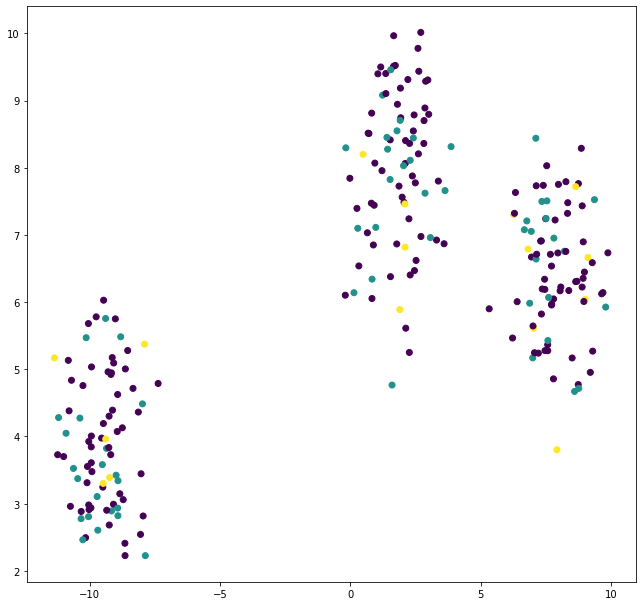

In [298]:
%matplotlib inline

plt.figure(figsize=(24, 36))

n_samples = 245
random_state = 20
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
aa_m_scaled = sklearn.preprocessing.scale(aa_m)
print(aa_m_scaled)
kmeans = KMeans(init="random", n_clusters=3, n_init=15, max_iter=100, random_state=10)
kmeans.fit(aa_m_scaled)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(aa_m_scaled)

plt.subplot(321)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

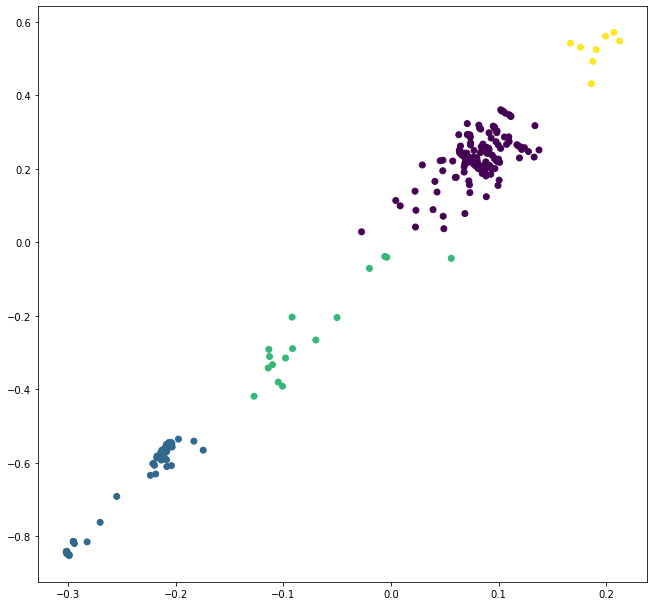

In [299]:
transformation = [[0.49, -0.6], [-0.35, 0.99]]
aa_m_aniso = np.dot(aa_m_scaled, transformation)
y_pred = KMeans(n_clusters=4, random_state=50).fit_predict(aa_m_aniso)
plt.figure(figsize=(24, 36))
plt.subplot(324)
plt.scatter(aa_m_aniso[:, 0], aa_m_aniso[:, 1], c=y_pred)

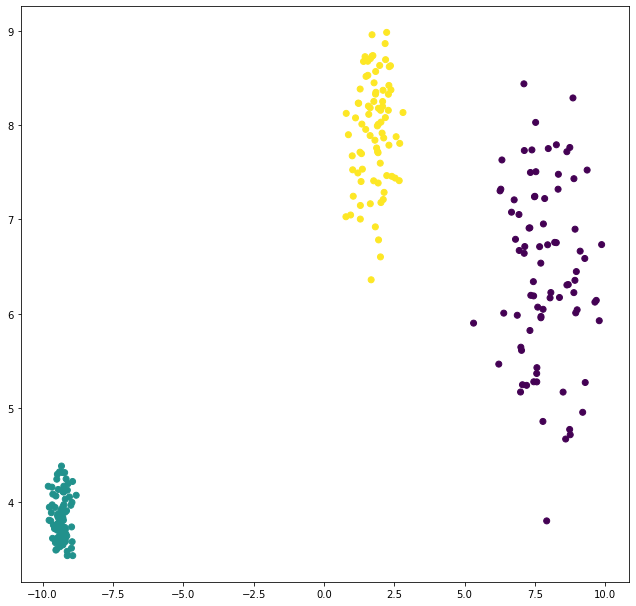

In [300]:
aa_m_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[0.50, 1.0, 0.25],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(aa_m_varied)
plt.figure(figsize=(24, 36))
plt.subplot(325)
plt.scatter(aa_m_varied[:, 0], aa_m_varied[:, 1], c=y_pred)
plt.show()

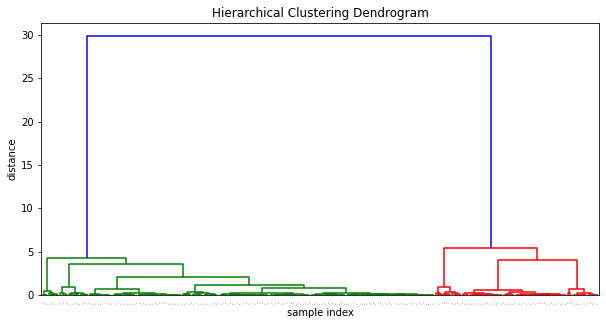

In [310]:
WARD=lk(aa_m_scaled, 'ward')
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    WARD,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=0.,  # font size for the x axis labels
)
plt.show()

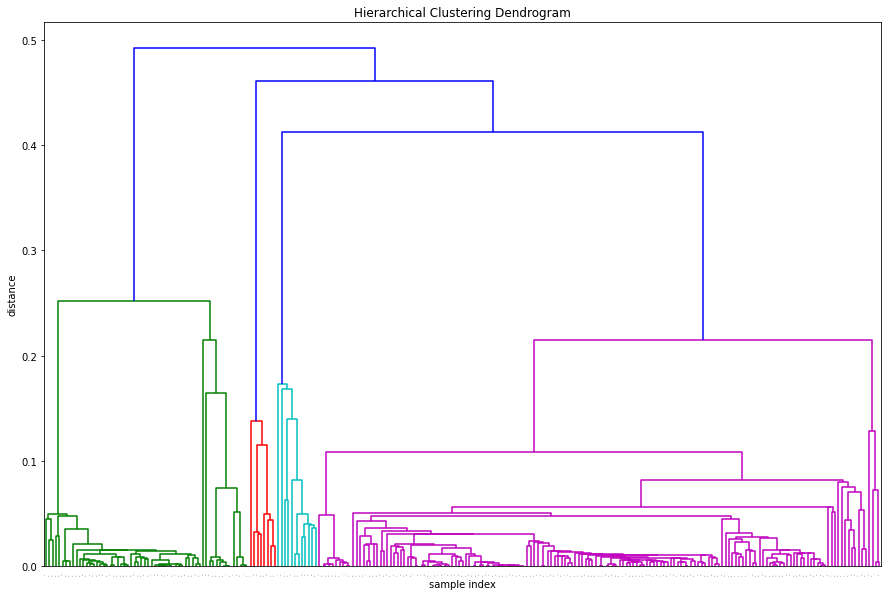

In [305]:
SINGLE_LINKAGE=lk(aa_m_scaled, 'single')
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    SINGLE_LINKAGE,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=0.,  # font size for the x axis labels
)
plt.show()

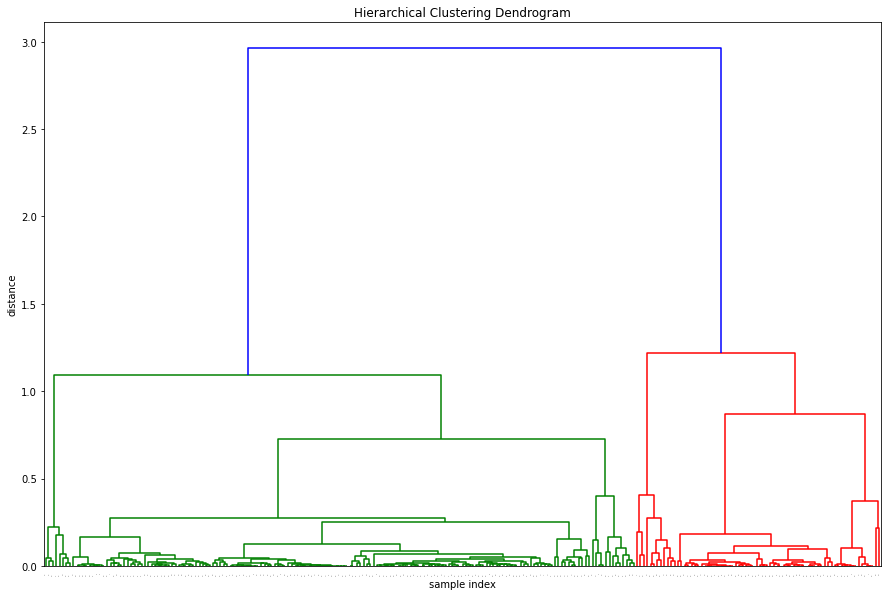

In [308]:
AVERAGE=lk(aa_m_scaled, 'average')
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    AVERAGE,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=0.,  # font size for the x axis labels
)
plt.show()